# Market Basket Analysis POC

### Installation of libraries

In [16]:
%pip install -q mlxtend networkx



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import validmind as vm

vm.init(
  api_host = "...",
  api_key = "...",
  api_secret = "...",
  project = "..."
)

In [17]:
import pandas as pd

## Dataset Loader

In [18]:

# Read the Excel file into a pandas DataFrame
retail = pd.read_csv('./datasets/mba/Online Retail.csv')

def preprocess(retail):
    # Drop rows where any of the elements is missing
    retail = retail.dropna()

    # Convert the 'Description' column to a categorical type (similar to factor in R)
    retail['Description'] = retail['Description'].astype('category')
    # Convert the 'Country' column to a categorical type
    retail['Country'] = retail['Country'].astype('category')
    # Convert the 'InvoiceDate' to datetime format if not already
    retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
    # Extract just the date part and store in a new column
    retail['Date'] = retail['InvoiceDate'].dt.date
    # Extract time from 'InvoiceDate' and store in another variable
    TransTime = retail['InvoiceDate'].dt.strftime('%H:%M:%S')
    # Convert 'InvoiceNo' to string first, then to numeric, handling errors by coercing invalid parses to NaN
    InvoiceNo = pd.to_numeric(retail['InvoiceNo'].astype(str), errors='coerce')
    # Add 'TransTime' and 'InvoiceNo' as new columns to the 'retail' DataFrame
    retail['TransTime'] = pd.to_datetime(retail['InvoiceDate']).dt.strftime('%H:%M:%S')  # Redefining for clarity
    retail['InvoiceNo'] = pd.to_numeric(retail['InvoiceNo'].astype(str), errors='coerce')
    retail['InvoiceNo'] = InvoiceNo
    return retail

retail = preprocess(retail)

# Display the first few rows of the DataFrame
print(retail.head())
# Display data types and non-null counts for each column
print(retail.info())

# Show summary statistics for numeric columns
print(retail.describe())

/var/folders/sc/lgv7gk896jz_3892tx_99d680000gn/T/ipykernel_8906/1687469113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Description'] = retail['Description'].astype('category')
/var/folders/sc/lgv7gk896jz_3892tx_99d680000gn/T/ipykernel_8906/1687469113.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Country'] = retail['Country'].astype('category')
/var/folders/sc/lgv7gk896jz_3892tx_99d680000gn/T/ipykernel_8906/1687469113.py:13: SettingWithCopyWarning: 
A value is trying to be set 

   InvoiceNo StockCode                          Description  Quantity  \
0   536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1   536365.0     71053                  WHITE METAL LANTERN         6   
2   536365.0    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3   536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4   536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Date  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   

  TransTime  
0  08:26:00  
1  08:26:00  
2  08:26:00  
3  08:26:00  
4  08:26:00  
<class 'pandas.core.

/var/folders/sc/lgv7gk896jz_3892tx_99d680000gn/T/ipykernel_8906/1687469113.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['TransTime'] = pd.to_datetime(retail['InvoiceDate']).dt.strftime('%H:%M:%S')  # Redefining for clarity
/var/folders/sc/lgv7gk896jz_3892tx_99d680000gn/T/ipykernel_8906/1687469113.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['InvoiceNo'] = pd.to_numeric(retail['InvoiceNo'].astype(str), errors='coerce')
/var/folders/sc/lgv7gk896jz_3892tx_99d680000gn/T/ipykernel_8

In [19]:
# Group by 'InvoiceNo' and 'Date', then apply a custom function to concatenate 'Description'
transactionData = retail.groupby(['InvoiceNo', 'Date'])['Description'].apply(lambda x: ', '.join(x.astype(str))).reset_index()

# Rename the concatenated descriptions column for clarity
transactionData.rename(columns={'Description': 'ConcatenatedDescriptions'}, inplace=True)

# Remove the 'InvoiceNo' and 'Date' columns
transactionData.drop(['InvoiceNo', 'Date'], axis=1, inplace=True)

# Rename the remaining column to 'items'
transactionData.columns = ['items']

# Display the modified DataFrame
print(transactionData)
# Write the DataFrame to a CSV file without quotes and without row names (indices)
transactionData.to_csv('./datasets/mba//market_basket_transactions.csv', index=False, quoting=0)

                                                   items
0      WHITE HANGING HEART T-LIGHT HOLDER, WHITE META...
1      HAND WARMER UNION JACK, HAND WARMER RED POLKA DOT
2      ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHOU...
3      JAM MAKING SET WITH JARS, RED COAT RACK PARIS ...
4                               BATH BUILDING BLOCK WORD
...                                                  ...
18531  LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEAR...
18532  RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE ...
18533  BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTTL...
18534  LARGE CAKE STAND  HANGING STRAWBERY, SET OF 3 ...
18535  CIRCUS PARADE LUNCH BOX , PLASTERS IN TIN CIRC...

[18536 rows x 1 columns]


## model

In [20]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Read the CSV file
data = pd.read_csv('./datasets/mba//market_basket_transactions.csv', header=None)

transactions = [row[0].split(',') for row in data.values]

# Use TransactionEncoder from mlxtend to encode the list of transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)


In [21]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate frequent itemsets
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the rules
print(rules)

                            antecedents                         consequents  \
0           ( FANCY FONT BIRTHDAY CARD)                                 ( )   
1                                   ( )         ( FANCY FONT BIRTHDAY CARD)   
2    ( 60 CAKE CASES DOLLY GIRL DESIGN)  ( PACK OF 72 RETROSPOT CAKE CASES)   
3     ( ALARM CLOCK BAKELIKE CHOCOLATE)       ( ALARM CLOCK BAKELIKE GREEN)   
4     ( ALARM CLOCK BAKELIKE CHOCOLATE)        ( ALARM CLOCK BAKELIKE RED )   
..                                  ...                                 ...   
216      ( SET 3 RETROSPOT TEA, COFFEE)                             (SUGAR)   
217                     (SUGAR, COFFEE)              ( SET 3 RETROSPOT TEA)   
218              ( SET 3 RETROSPOT TEA)                     (SUGAR, COFFEE)   
219                             (SUGAR)      ( SET 3 RETROSPOT TEA, COFFEE)   
220                            (COFFEE)       ( SET 3 RETROSPOT TEA, SUGAR)   

     antecedent support  consequent support   suppo

/Users/anilsorathiya/work/validmind/repos/developer-framework/.venv/lib/python3.10/site-packages/seaborn/palettes.py:443: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap(name)


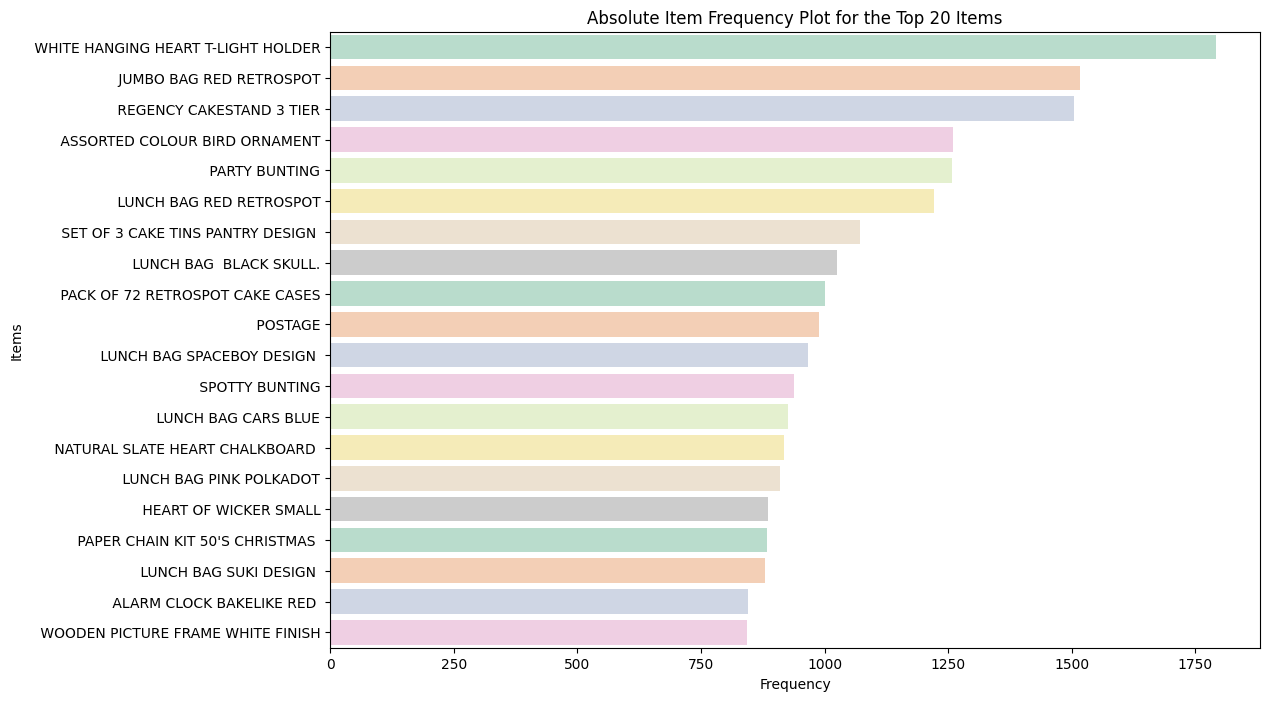

In [22]:
from mlxtend.frequent_patterns import apriori
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate item frequencies
item_frequencies = transaction_df.sum(axis=0).sort_values(ascending=False)[:20]

# Create a bar plot for the item frequencies
plt.figure(figsize=(12, 8))
sns.barplot(x=item_frequencies.values, y=item_frequencies.index, palette="Pastel2")
plt.title("Absolute Item Frequency Plot for the Top 20 Items")
plt.xlabel("Frequency")
plt.ylabel("Items")
plt.show()

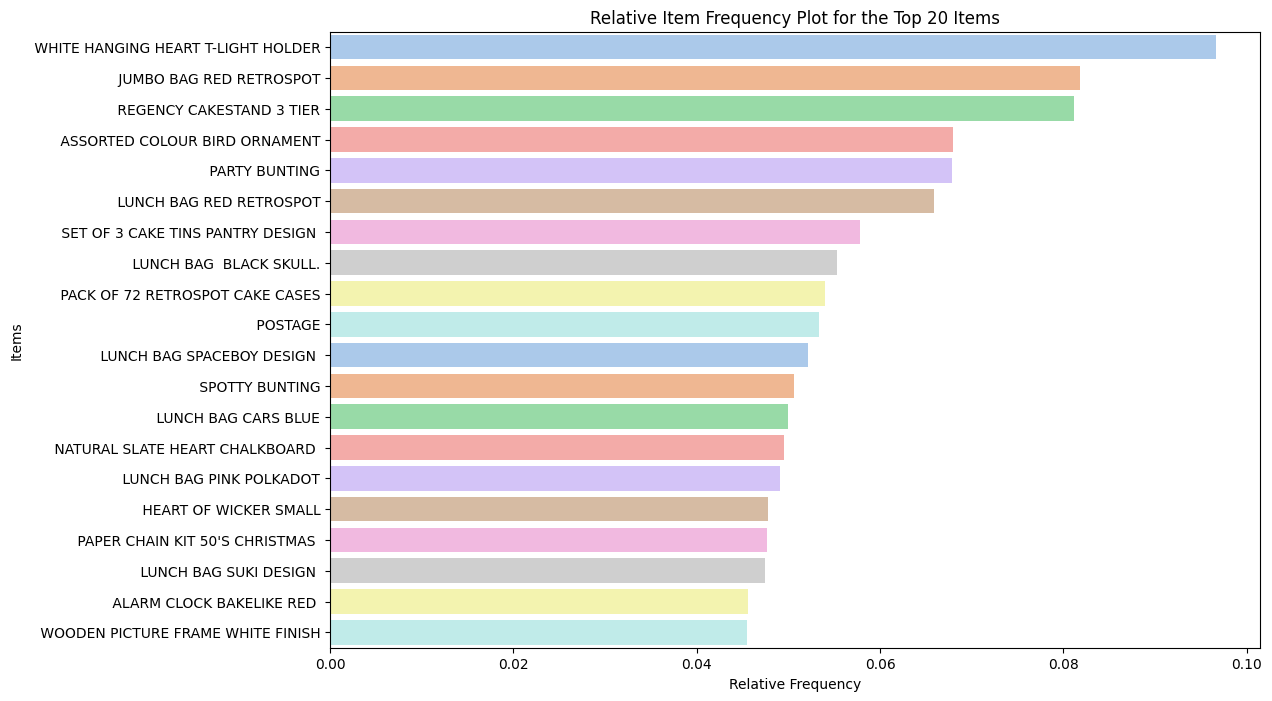

In [23]:
# Calculate relative item frequencies
total_transactions = transaction_df.shape[0]
item_frequencies = (transaction_df.sum(axis=0) / total_transactions).sort_values(ascending=False)[:20]


import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the relative item frequencies
plt.figure(figsize=(12, 8))
sns.barplot(x=item_frequencies.values, y=item_frequencies.index, palette="pastel")
plt.title("Relative Item Frequency Plot for the Top 20 Items")
plt.xlabel("Relative Frequency")
plt.ylabel("Items")
plt.show()


In [24]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd


# Generate frequent itemsets
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True, max_len=3)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
# Display the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

                         antecedents                         consequents  \
0        ( FANCY FONT BIRTHDAY CARD)                                 ( )   
1                      ( BACK DOOR )                         ( KEY FOB )   
2  ( PINK REGENCY TEACUP AND SAUCER)  ( GREEN REGENCY TEACUP AND SAUCER)   
3                            ( SHED)                         ( KEY FOB )   
4   ( POPPY'S PLAYHOUSE LIVINGROOM )        ( POPPY'S PLAYHOUSE KITCHEN)   
5          ( REGENCY TEA PLATE PINK)         ( REGENCY TEA PLATE GREEN )   
6             ( SET 3 RETROSPOT TEA)                            (COFFEE)   
7             ( SET 3 RETROSPOT TEA)                             (SUGAR)   
8                            (SUGAR)              ( SET 3 RETROSPOT TEA)   
9                            (SUGAR)                            (COFFEE)   

    support  confidence       lift  
0  0.013109    1.000000  47.652956  
1  0.012462    0.987179  49.591724  
2  0.023089    0.813688  22.613701  
3  0.014134    

In [25]:
def is_subset(df, rule_index):
    antecedents = df.loc[rule_index, 'antecedents']
    consequents = df.loc[rule_index, 'consequents']
    # Check each rule against all other rules
    for idx, row in df.iterrows():
        if idx != rule_index and antecedents.issubset(row['antecedents']) and consequents.issubset(row['consequents']):
            return True
    return False


# Assuming 'rules' is the DataFrame obtained from association_rules
rules['is_subset'] = [is_subset(rules, i) for i in rules.index]
# Filter rules to remove those marked as subsets
filtered_rules = rules[~rules['is_subset']]
print(f"Number of non-redundant rules: {len(filtered_rules)}")


Number of non-redundant rules: 13


In [26]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,is_subset
0,( FANCY FONT BIRTHDAY CARD),( ),0.013109,0.020985,0.013109,1.000000,47.652956,0.012834,inf,0.992019,False
1,( BACK DOOR ),( KEY FOB ),0.012623,0.019906,0.012462,0.987179,49.591724,0.012210,76.447322,0.992362,False
3,( SHED),( KEY FOB ),0.014296,0.019906,0.014134,0.988679,49.667066,0.013849,86.574958,0.994077,False
4,( POPPY'S PLAYHOUSE LIVINGROOM ),( POPPY'S PLAYHOUSE KITCHEN),0.013433,0.018234,0.011329,0.843373,46.253297,0.011084,6.268200,0.991701,False
5,( REGENCY TEA PLATE PINK),( REGENCY TEA PLATE GREEN ),0.011760,0.013972,0.010250,0.871560,62.378768,0.010085,7.676932,0.995678,False
10,"( PINK REGENCY TEACUP AND SAUCER, REGENCY CAK...",( GREEN REGENCY TEACUP AND SAUCER),0.013864,0.035982,0.011814,0.852140,23.682340,0.011315,6.519805,0.971240,False
11,"( ROSES REGENCY TEACUP AND SAUCER , PINK REGE...",( GREEN REGENCY TEACUP AND SAUCER),0.021363,0.035982,0.018342,0.858586,23.861478,0.017573,6.816984,0.979006,False
12,"( PINK REGENCY TEACUP AND SAUCER, REGENCY CAK...",( ROSES REGENCY TEACUP AND SAUCER ),0.013864,0.039273,0.011275,0.813230,20.707193,0.010730,5.143894,0.965088,False
13,"( SET 3 RETROSPOT TEA, SUGAR)",(COFFEE),0.012354,0.017209,0.012354,1.000000,58.109718,0.012141,inf,0.995084,False
14,"( SET 3 RETROSPOT TEA, COFFEE)",(SUGAR),0.012354,0.013001,0.012354,1.000000,76.917012,0.012193,inf,0.999345,False


/Users/anilsorathiya/work/validmind/repos/developer-framework/.venv/lib/python3.10/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/anilsorathiya/work/validmind/repos/developer-framework/.venv/lib/python3.10/site-packages/setuptools/_distutils/version.py:337: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/anilsorathiya/work/validmind/repos/developer-framework/.venv/lib/python3.10/site-packages/seaborn/palettes.py:443: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap(name)


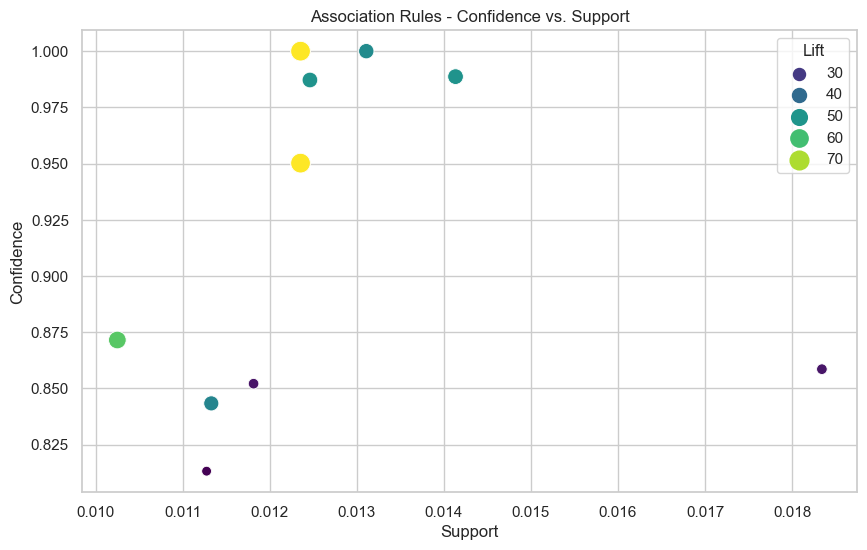

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_rules' is the DataFrame containing the association rules generated earlier

# Filter rules where confidence is greater than 0.4
subRules = filtered_rules[filtered_rules['confidence'] > 0.4]

# Setting the aesthetic style of seaborn plots
sns.set(style="whitegrid")

# Creating the scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='support', y='confidence', data=subRules, size='lift', sizes=(50, 200), hue='lift', palette='viridis', legend='brief')

# Adding titles and labels
plt.title('Association Rules - Confidence vs. Support')
plt.xlabel('Support')
plt.ylabel('Confidence')

# Adding a legend with title
plt.legend(title='Lift')

# Showing the plot
plt.show()

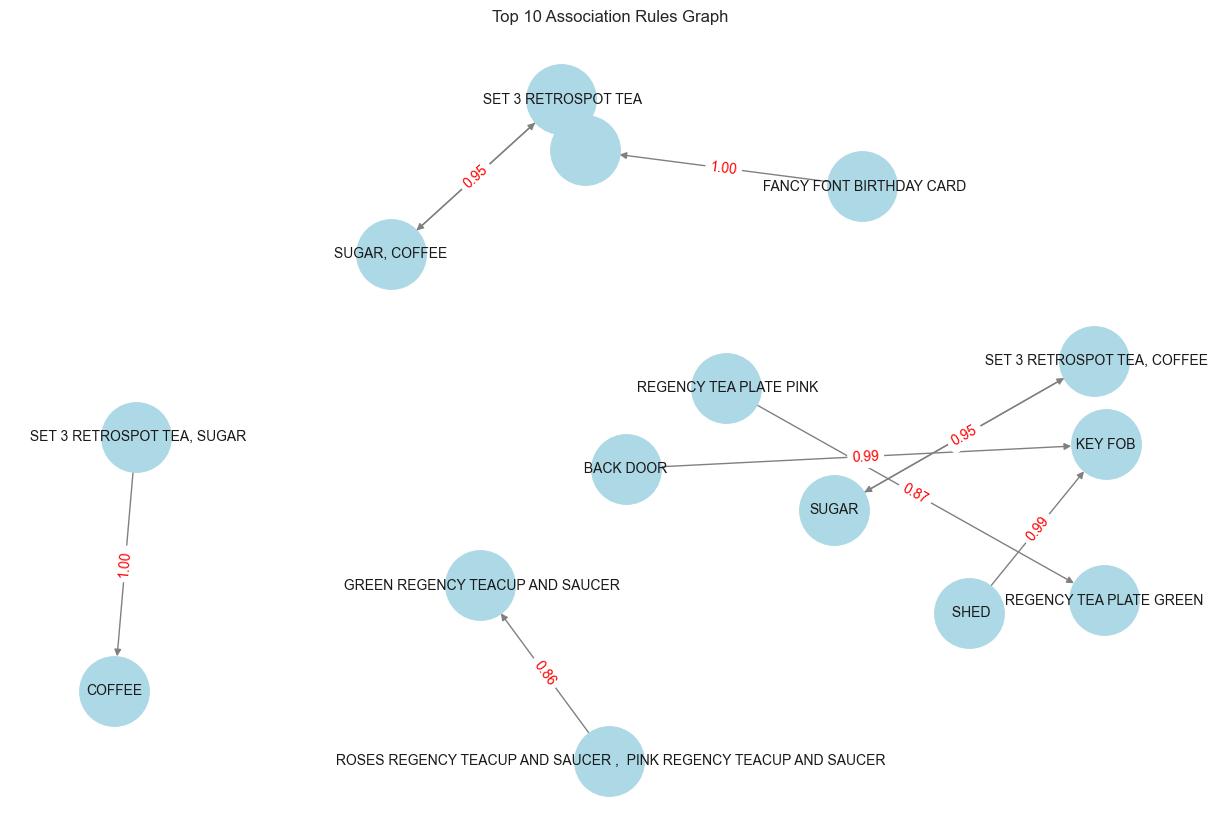

In [28]:
top10subRules = subRules.sort_values(by='confidence', ascending=False).head(10)

import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges from antecedents to consequents for each rule
for _, rule in top10subRules.iterrows():
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))
    G.add_edge(antecedents, consequents, weight=rule['confidence'])

# Position nodes using the spring layout
pos = nx.spring_layout(G, k=0.5, iterations=20)

plt.figure(figsize=(12, 8))

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500, edge_color='gray', linewidths=1, font_size=10)

# Draw edge labels based on the confidence of each rule
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Display the plot
plt.title('Top 10 Association Rules Graph')
plt.show()
